In [ ]:
# Notebook: SciKit Learn K-Nearest Neighbors
# Author: Thomas Purk
# Date: 2025-03-28
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Reference: https://www.ibm.com/think/topics/logistic-regression
# Reference: https://www.kaggle.com/c/titanic/data

# K-Nearest Neighbors

> The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.

[https://www.ibm.com/think/topics/knn](https://www.ibm.com/think/topics/knn)

**Data Source**

> Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

[https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

<br>

**Additional Variable Information**

Target
1. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

In [4]:
# Use the UC Irvine Machine Learning Repository's Python Package to load the data
#!pip install ucimlrepo
!pip list | grep ucimlrepo

ucimlrepo                          0.0.7


In [58]:
# Notebook Setup

# Data, Arrays, Linear Algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time

In [22]:
# Load Data
# NOTE: SciKit Learn's built in breast cancer dataset could be used here.
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
# The UCI dataset is used instead purely to exercise the alternative

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)

In [11]:
# Validate Data load

display(X.head())
print('')
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [14]:
# This is a well-known, well formated dataset.
# Additional exploration, cleaning and engineering is not needed

In [26]:
# Prepare the data for the KNN model

# Standardize all values to similar scale
# Standardizing avoids one factor overpowering the distance formular
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [27]:
# Reformate the scalled nested arrays back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [28]:
X_scaled

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Train the Model

In [32]:


# Create Training and Test Splits
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## Predictions & Evaluations

In [38]:
# Make predictions
predictions = knn.predict(X_test)

In [59]:
# Evaluate model performance

# Accurcay
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9591


In [44]:
# Clasification Report
cr = classification_report(y_test,predictions)

print('Classification Report: M = Malignant, B = Benign')
print('')
print(cr)
print('')
print('precision: (true positives) / ((true positives) + (false positives))')
print('recall: (true positives) / ((true positives) + (false negatives))')
print('f1-score: 2 * ((precision * recall) / (precision + recall))')

Classification Report: M = Malignant, B = Benign

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
           M       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


precision: (true positives) / ((true positives) + (false positives))
recall: (true positives) / ((true positives) + (false negatives))
f1-score: 2 * ((precision * recall) / (precision + recall))


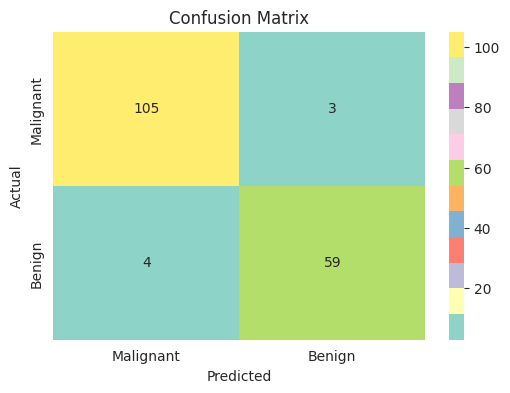

In [47]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Set3",
    xticklabels=["Malignant", "Benign"],
    yticklabels=["Malignant", "Benign"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Is it possible to improve the results by finding the best "k"?

In [66]:
# Iterate several K values and record the error rate

# Track the error rate for each k value tested
error_rate = []

# Set the range of k values to test
k_range = range(1,40)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Record the mean of predicted classes that were not the same as the known classes
    #error_rate.append(np.mean(pred_i != y_test['Diagnosis']))
    error_rate.append(1 - accuracy_score(y_test['Diagnosis'], pred_i))

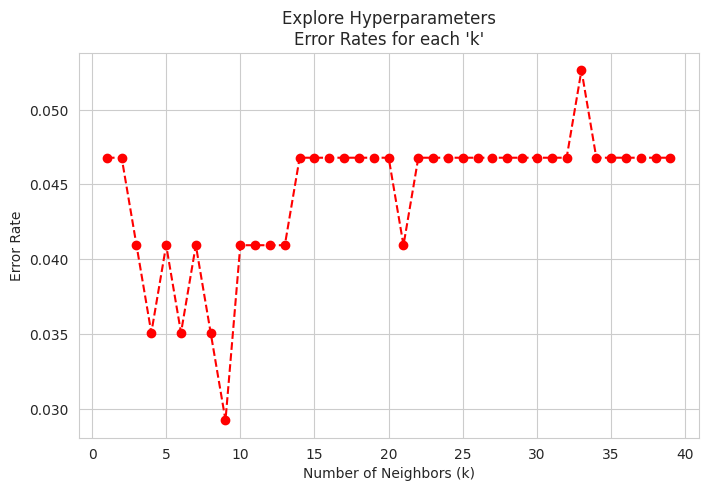

In [74]:
# Plot error rate vs. k
plt.figure(figsize=(8, 5))

plt.plot(
    k_range,
    error_rate,
    marker='o',
    linestyle='dashed',
    color='red'
)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Explore Hyperparameters\nError Rates for each 'k'")
plt.show()

In [69]:
# Retrain for best k

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate model performance

# Accurcay
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9708


In [ ]:
# Accuracy improve by 2 percent for k=9 vs k=5

In [71]:
# Clasification Report
cr = classification_report(y_test,predictions)

print('Classification Report: M = Malignant, B = Benign')
print('')
print(cr)
print('')
print('precision: (true positives) / ((true positives) + (false positives))')
print('recall: (true positives) / ((true positives) + (false negatives))')
print('f1-score: 2 * ((precision * recall) / (precision + recall))')

Classification Report: M = Malignant, B = Benign

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


precision: (true positives) / ((true positives) + (false positives))
recall: (true positives) / ((true positives) + (false negatives))
f1-score: 2 * ((precision * recall) / (precision + recall))


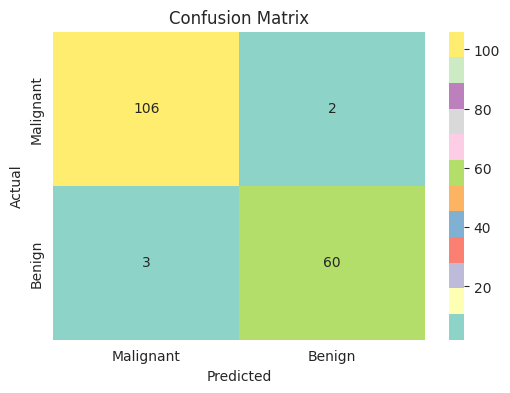

In [72]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Set3",
    xticklabels=["Malignant", "Benign"],
    yticklabels=["Malignant", "Benign"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()